In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

pd.options.display.max_columns = None
pd.options.display.max_rows = None

%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving bike_sharing_daily_data.csv to bike_sharing_daily_data.csv


In [4]:
import io
bike_share = pd.read_csv(io.BytesIO(uploaded['bike_sharing_daily_data.csv']))

In [5]:
bike_share.head()

,date,season,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,trips
0,2020-01-01,Spring,0,6,0,Misty and Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2020-01-02,Spring,0,0,0,Misty and Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2020-01-03,Spring,0,1,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2020-01-04,Spring,0,2,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2020-01-05,Spring,0,3,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        731 non-null    object 
 1   season      731 non-null    object 
 2   holiday     731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weather     731 non-null    object 
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  casual      731 non-null    int64  
 11  registered  731 non-null    int64  
 12  trips       731 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 74.4+ KB


 1. How was the daily trend of trips for the year 2020? Is there any popular day we see a spike? Yes but no significant there's a spike on june in 2020

In [7]:
bike_share['date'] = pd.to_datetime(bike_share['date'])
#year = bike_share['date'].apply(lambda x: x.year == 2020)

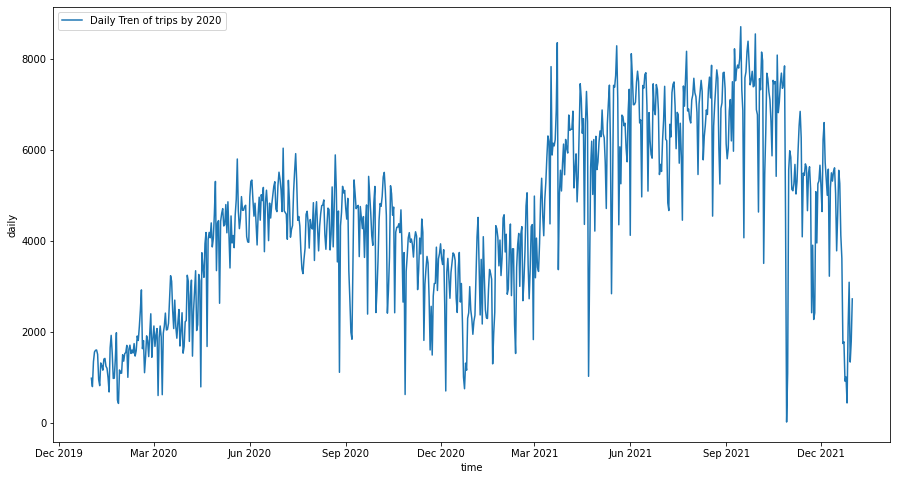

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(bike_share['date'], bike_share['trips'], color='tab:blue', label='Daily Tren of trips by 2020')

ax.set_xlabel('time')
ax.set_ylabel('daily')

from matplotlib.dates import DateFormatter, MonthLocator

ax.xaxis.set_major_locator(MonthLocator(interval = 3)) 
ax.xaxis.set_major_formatter(DateFormatter('%b %Y')) 
## place the legend at upper left corner
ax.legend(loc='upper left');

2. How are holidays having an effect on the overall trip count? No there's no effect on trips in holidays, the highest is come from either weekday or workingday (with zero value) 



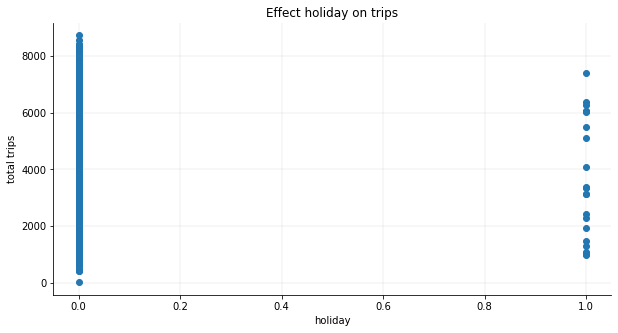

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(bike_share['holiday'], bike_share['trips'])

#adds a title and axes labels
ax.set_title('Effect holiday on trips')
ax.set_xlabel('holiday')
ax.set_ylabel('total trips')

#remove the box
ax.spines['top'].set_visible(False)                                         ## removes the top border
ax.spines['right'].set_visible(False)                                       ## removes the right border

# add grid lines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)             ## adds the grid lines of grey colour of 0.5 opacity & 0.25 line width  

plt.show()

3. Does weather have an affect on the trip share count ? Yes, the highest trip is in clearly/party cloudly weather and the lowest is in rain/snow,thunderstrom


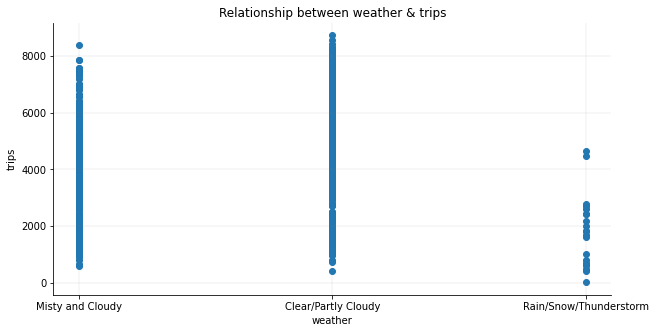

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(bike_share['weather'], bike_share['trips'])

#adds a title and axes labels
ax.set_title('Relationship between weather & trips')
ax.set_xlabel('weather')
ax.set_ylabel('trips')

#remove the box
ax.spines['top'].set_visible(False)                                         ## removes the top border
ax.spines['right'].set_visible(False)                                       ## removes the right border

# add grid lines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)             ## adds the grid lines of grey colour of 0.5 opacity & 0.25 line width  

plt.show()

4. Is there a significant difference in the ridership trend based on the membership type i.e. casual member or registered member?

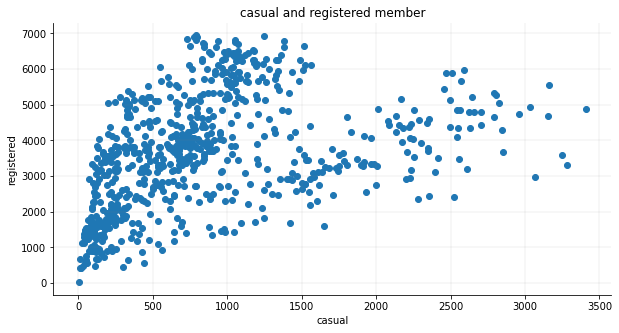

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(bike_share['casual'], bike_share['registered'])

#adds a title and axes labels
ax.set_title('casual and registered member')
ax.set_xlabel('casual')
ax.set_ylabel('registered')

#remove the box
ax.spines['top'].set_visible(False)                                         ## removes the top border
ax.spines['right'].set_visible(False)                                       ## removes the right border

# add grid lines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)             ## adds the grid lines of grey colour of 0.5 opacity & 0.25 line width  

plt.show()

5. Are there popular days of the week which have higher or lower rideshare trips?

Noted : I guess for this case I try to create a new table in order see a different between holiday and working day in all the trips. I expected to get the result on the chart which is show the highest day of all the trips but instead I just get this blank table

In [21]:
def days(holiday, working):
	if holiday == 0: 
	   return 'workingday'
	elif working == 0: 
	   return 'holiday'

In [24]:
bike_share['days'] = bike_share[['holiday', 'workingday']].apply(lambda x: days)

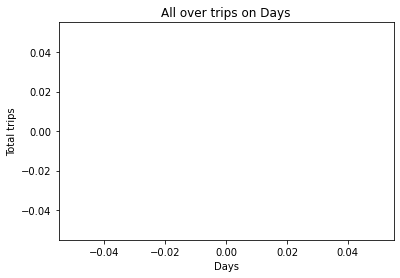

In [39]:
#Creating the dataset
#df=data.groupby('continent')['total_cases'].sum().to_frame().reset_index()
#Creating the column plot 
plt.bar(bike_share['days'],bike_share['trips'])
        #color = ['#F0F8FF','#E6E6FA','#B0E0E6','#E6ABFA','#FAE680','#ABFAE6']) # you can specify you colur choices using hex codes
#Adding the aesthetics
plt.title('All over trips on Days')
plt.xlabel('Days')
plt.ylabel('Total trips') 
#Show the plot
plt.show()

In [29]:
bike_share.head()
#bike_share.isnull()
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        731 non-null    datetime64[ns]
 1   season      731 non-null    object        
 2   holiday     731 non-null    int64         
 3   weekday     731 non-null    int64         
 4   workingday  731 non-null    int64         
 5   weather     731 non-null    object        
 6   temp        731 non-null    float64       
 7   atemp       731 non-null    float64       
 8   hum         731 non-null    float64       
 9   windspeed   731 non-null    float64       
 10  casual      731 non-null    int64         
 11  registered  731 non-null    int64         
 12  trips       731 non-null    int64         
 13  days        0 non-null      object        
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)
memory usage: 80.1+ KB
